# info
This script reads the Seahorse experiment data.
It performs quantitative analysis and builds figures for publication.

In [1]:
import pandas, seaborn, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
input_file = '/home/adrian/gd15/hi/research/huvec/results/seahorse/v001/HUVEC - 01.xlsx'

# 1. read data

## 1.1. OCR

In [3]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=8, nrows=15)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ocr=df

before trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'Unnamed: 7', 'C04',
       'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'Unnamed: 16', 'B04',
       'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'Unnamed: 25', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 34', 'D04',
       'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 43', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'Unnamed: 52', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'Unnamed: 61', 'B02',
       'C02', 'D02', 'E02', 'F02', 'G02'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'C04', 'C05', 'C06',
       'C07', 'C08', 'C09', 'C10', 'C11', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B09', 'B10', 'B11', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
       'E11', 'D04',

In [4]:
ocr

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,118.224710,103.786360,102.395492,545.595593,103.645696,52.556486,258.849568,231.874849,397.497737,...,89.235173,102.441019,231.310127,71.240242,106.041849,103.066599,93.746282,105.185561,102.302946,71.738424
1,7.775667,258.034057,101.026967,100.687131,529.304004,98.424437,49.321177,246.098802,219.280540,376.814917,...,83.795252,98.406006,226.488086,70.567140,98.556340,101.739053,89.803790,99.734027,92.918339,70.480344
2,14.233321,193.249495,99.057729,98.283094,520.213095,98.054813,48.190918,240.440208,214.888389,365.021912,...,81.326025,95.701448,221.479612,69.791751,97.314417,100.162452,89.062807,96.833130,90.689514,69.621394
3,20.693441,163.031212,99.446555,97.287709,517.808335,96.338131,46.865429,239.292099,211.549889,363.711004,...,80.251694,95.828183,218.300493,69.515024,95.777348,98.470615,88.540155,96.139320,89.277465,68.483761
4,27.150621,150.565371,98.366719,96.231017,508.681234,94.509597,44.800475,237.424164,208.591263,357.823327,...,79.065487,95.668252,217.696836,68.068904,93.810062,97.643545,86.846921,94.876652,88.641148,66.421013
5,33.607746,144.639339,95.713731,95.356329,501.577978,93.724419,43.970018,236.388006,205.470503,360.879323,...,78.834044,92.561844,211.505016,66.824352,93.072504,96.521718,86.767205,93.833655,87.095327,65.530157
6,40.178781,106.422204,51.503574,48.288397,264.675969,50.700033,30.820259,126.458958,112.757839,152.969380,...,39.472398,48.903272,274.517814,35.372747,49.354392,52.857110,49.747326,50.468874,43.796462,38.069167
7,46.639178,102.852217,52.277146,46.792949,255.539521,49.267702,29.401402,114.988902,107.965089,149.775818,...,37.901776,46.049030,222.515433,33.510279,49.139220,51.007794,48.319600,49.560142,41.716637,36.474934
8,53.102267,104.048155,51.197533,46.382091,249.709592,47.563985,27.220564,111.316040,105.606132,140.658483,...,37.972750,45.985048,189.699311,33.662689,49.009608,50.661378,48.122699,48.957170,40.485689,35.597243
9,59.671314,227.688806,237.967299,230.361539,1111.560129,190.636339,51.156126,540.785040,447.319699,808.661609,...,196.898322,216.440490,488.853331,151.309681,207.483171,227.365678,171.205798,205.585339,201.736147,34.373530


## 1.2. ECAR

In [5]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=28, nrows=15)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ecar=df

before trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'Unnamed: 7', 'C04',
       'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'Unnamed: 16', 'B04',
       'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'Unnamed: 25', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 34', 'D04',
       'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 43', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'Unnamed: 52', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'Unnamed: 61', 'B02',
       'C02', 'D02', 'E02', 'F02', 'G02'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'C04', 'C05', 'C06',
       'C07', 'C08', 'C09', 'C10', 'C11', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B09', 'B10', 'B11', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
       'E11', 'D04',

In [6]:
ecar

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,8.407650,6.550789,7.312128,41.521886,8.091077,4.013540,19.146398,13.175619,31.689542,...,9.566771,5.347914,12.052368,4.730697,6.931359,6.648399,7.504785,6.938617,5.522570,4.632651
1,7.775667,-0.264131,4.904418,7.179003,32.143923,7.444085,2.123587,12.418820,10.306310,23.939776,...,3.905701,3.833571,10.412226,2.709200,4.787936,3.194346,5.386889,5.762994,4.394033,3.577903
2,14.233321,3.774156,3.739499,5.109435,26.875110,5.874951,1.254280,12.578813,8.014592,21.363095,...,2.837738,3.001844,7.834734,2.267564,4.648508,3.118768,4.584218,5.174790,4.216804,3.283878
3,20.693441,4.409699,3.925573,5.149942,25.777219,5.552855,1.808173,12.349781,9.150861,20.874910,...,2.807116,3.399161,8.209417,1.880040,3.930347,2.870400,3.848486,4.514199,3.896197,2.972457
4,27.150621,4.671864,3.983525,4.664416,24.748340,5.158654,1.302240,12.171860,8.086874,19.412343,...,3.347142,2.898741,8.248772,1.905995,4.157470,3.100286,3.844490,4.399784,3.873631,2.948154
5,33.607746,4.882176,3.662231,4.851892,25.518304,4.944978,1.099326,12.184781,7.417192,17.024780,...,2.959837,3.248637,7.467483,1.837192,3.188379,2.490145,3.474555,4.129750,3.563046,2.674442
6,40.178781,4.954038,3.614188,4.347176,24.204810,4.226439,0.452539,15.197238,6.417041,16.044243,...,2.679426,2.289877,4.833579,1.989743,3.911269,2.799716,3.881380,3.918684,3.655992,2.374552
7,46.639178,3.572150,3.325960,4.125047,18.101669,4.517288,1.544476,13.319496,6.680230,13.366256,...,2.842062,1.809898,4.637234,1.742564,3.865643,2.567432,2.761180,3.107602,2.746757,2.112116
8,53.102267,3.134220,2.761857,3.410725,18.674054,3.293243,0.689704,10.846937,6.636985,10.739891,...,2.584877,1.427094,3.699437,1.188834,2.750348,2.019780,2.520486,2.963702,2.540712,1.713172
9,59.671314,14.517533,14.673493,14.828220,74.322409,12.451721,1.595933,35.591293,27.086100,52.552030,...,11.825688,11.035823,26.091098,7.845292,12.873629,12.892815,11.008922,13.719362,12.211434,1.526869


In [7]:
timepoints = ocr['time']
print(timepoints)
timepoints = ecar['time']
print(timepoints)

0      1.311822
1      7.775667
2     14.233321
3     20.693441
4     27.150621
5     33.607746
6     40.178781
7     46.639178
8     53.102267
9     59.671314
10    66.136260
11    72.599127
12    79.168761
13    85.633262
14    92.101479
Name: time, dtype: float64
0      1.311822
1      7.775667
2     14.233321
3     20.693441
4     27.150621
5     33.607746
6     40.178781
7     46.639178
8     53.102267
9     59.671314
10    66.136260
11    72.599127
12    79.168761
13    85.633262
14    92.101479
Name: time, dtype: float64


In [8]:
del df

# 2. Oxygen consumption rate (OCR) 

In [9]:
boxplot_basal = []
boxplot_maximal = []

# 2.1. work with 4 hours data

In [10]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
samples_4h_half = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
samples_4h_five = ['E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']

control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02']
samples_4h_half_representative = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']
samples_4h_five_representative = ['E04', 'E05', 'E06', 'E07', 'E09', 'E10', 'E11']

### 2.1.1. control

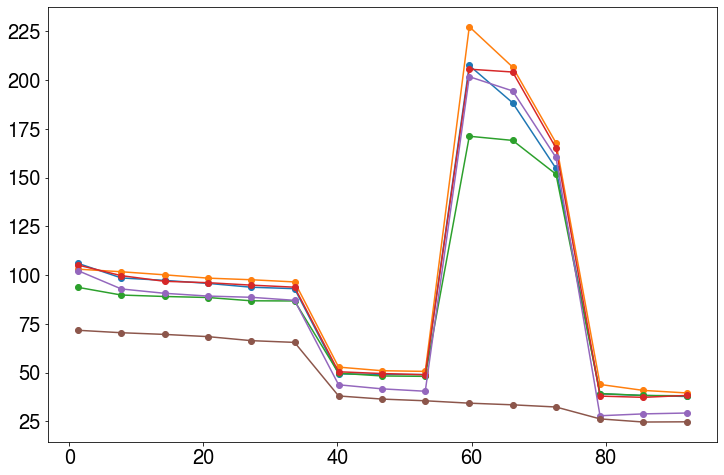

In [11]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells], 'o-')
matplotlib.pyplot.show()

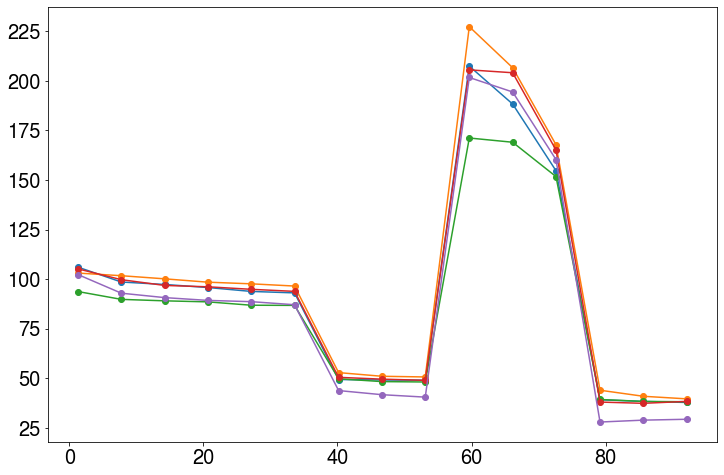

In [12]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [13]:
relative_mu = ocr[control_wells_representative].mean()/ocr[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ocr[control_wells_representative]/relative_mu

B02    1.011665
C02    1.069990
D02    0.932691
E02    1.030693
F02    0.954961
dtype: float64


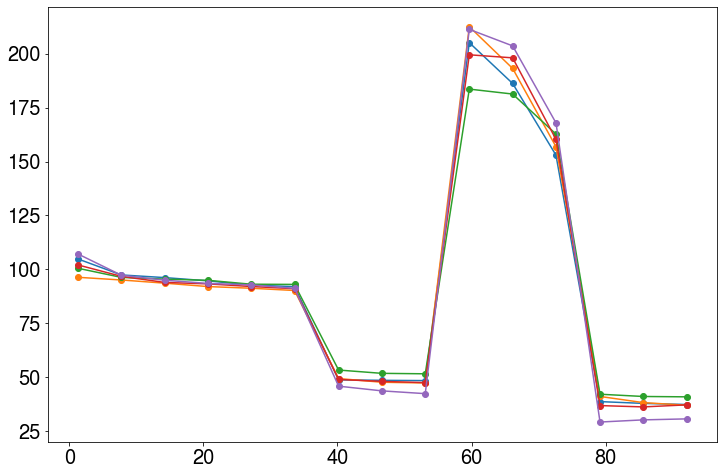

In [14]:
matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

### 2.1.2. samples 4 h 0.5 uM

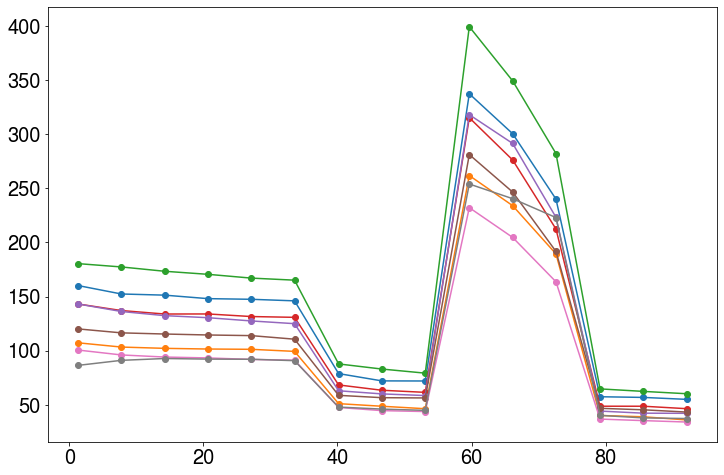

In [15]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half], 'o-')
matplotlib.pyplot.show()

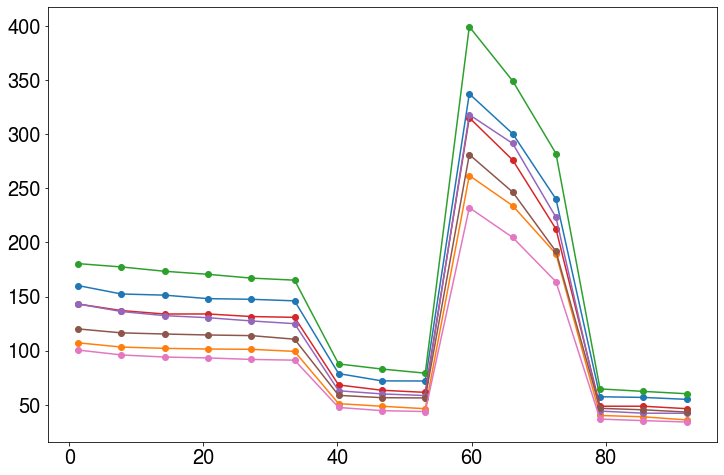

In [16]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

In [17]:
relative_mu = ocr[samples_4h_half_representative].mean()/ocr[samples_4h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_4h_half_representative]/relative_mu

D04    1.148978
D05    0.824444
D06    1.321490
D07    1.030487
D08    1.023225
D09    0.906967
D10    0.744409
dtype: float64


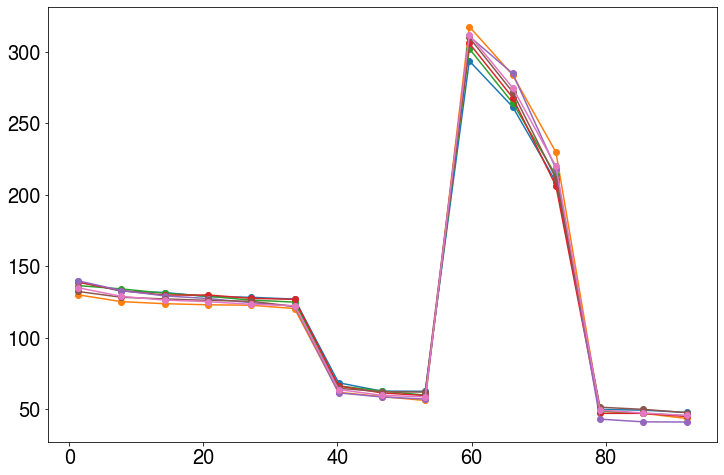

In [18]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

## 2.1.3. samples 4 h five

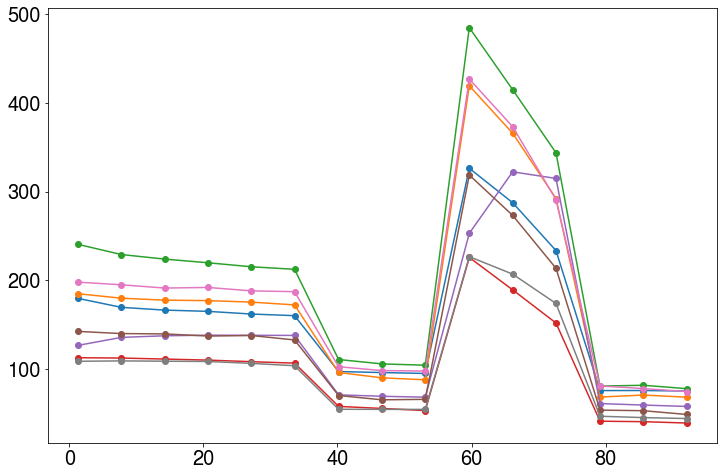

In [19]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five], 'o-')
matplotlib.pyplot.show()

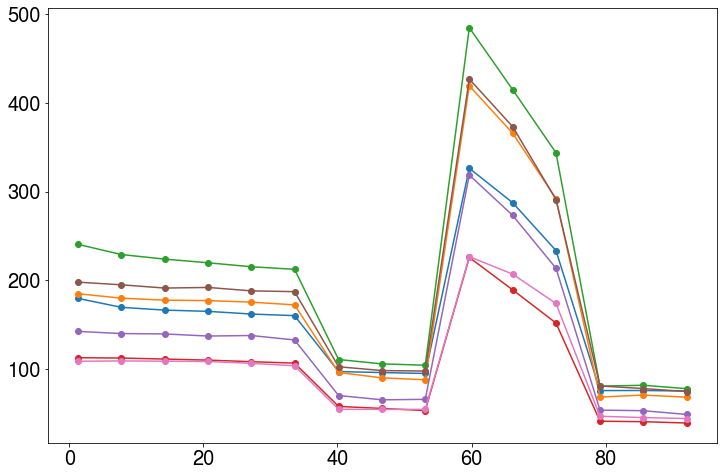

In [20]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

In [21]:
relative_mu = ocr[samples_4h_five_representative].mean()/ocr[samples_4h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_4h_five_representative]/relative_mu

E04    1.036570
E05    1.151096
E06    1.379212
E07    0.663838
E09    0.872829
E10    1.216393
E11    0.680061
dtype: float64


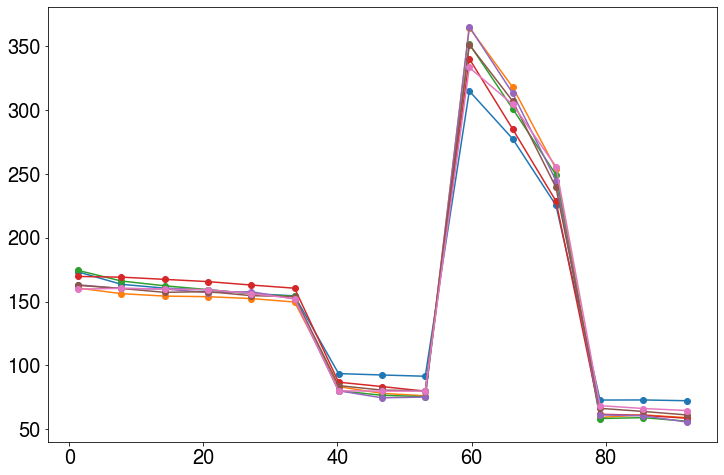

In [22]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

### 2.1.4. build figure

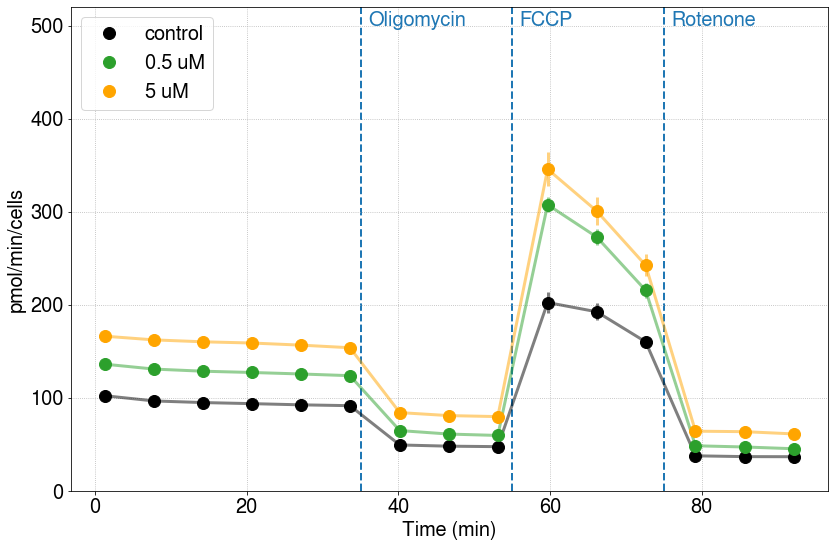

In [23]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 500, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 500, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 500, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 520])
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('seahorse.4h.svg')

In [24]:
normalized_black.iloc[5, :].to_list()
#normalized_black.iloc[9, :]


[91.99937576546667,
 90.2080441150447,
 93.02892349577527,
 91.03935618859286,
 91.2029797499397]

In [25]:
normalized_black

,B02,C02,D02,E02,F02
0,104.819185,96.324812,100.511658,102.053210,107.127832
1,97.419984,95.084103,96.284649,96.764019,97.300621
2,96.192380,93.610631,95.490192,93.949509,94.966679
3,94.673033,92.029460,94.929822,93.276360,93.488033
4,92.728430,91.256490,93.114393,92.051293,92.821706
5,91.999376,90.208044,93.028923,91.039356,91.202980
6,48.785335,49.399624,53.337435,48.965947,45.862022
7,48.572644,47.671274,51.806675,48.084276,43.684107
8,48.444527,47.347518,51.595564,47.499261,42.395104
9,205.090886,212.493246,183.561186,199.463155,211.250574


In [26]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[9, :].to_list()
b =  normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

### 2.1.5. statistical differences

In [27]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values
    
    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)
    
    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)
    
    print()

1.31182166
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

7.77566669
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

14.2333211116667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

20.6934414133333
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

27.15062079
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

33.6077456233333
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

40.1787807716667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

46.63917821
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

53.1022672866667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

59.6713138166667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

66.1362596516667
half: significant 0.00252

## 2.2. work with 24 hours data

In [28]:
samples_24h_half = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
samples_24h_five = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']

samples_24h_half_representative = ['B04', 'B05', 'B07', 'B08', 'B09', 'B10', 'B11'] # removed B06
samples_24h_five_representative = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']

### 2.2.1. half

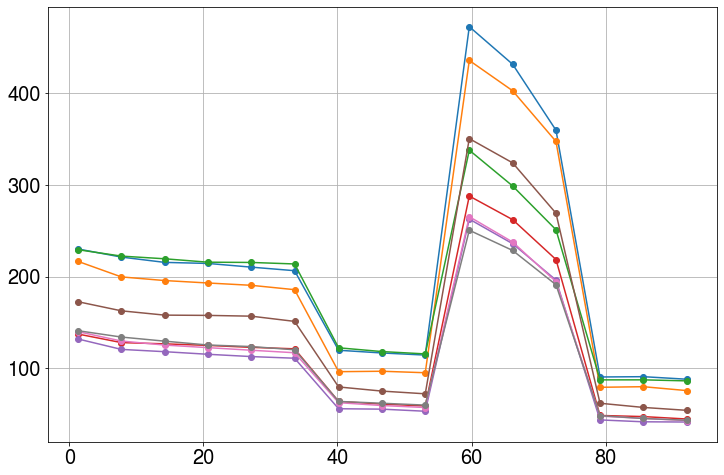

In [29]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_half], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

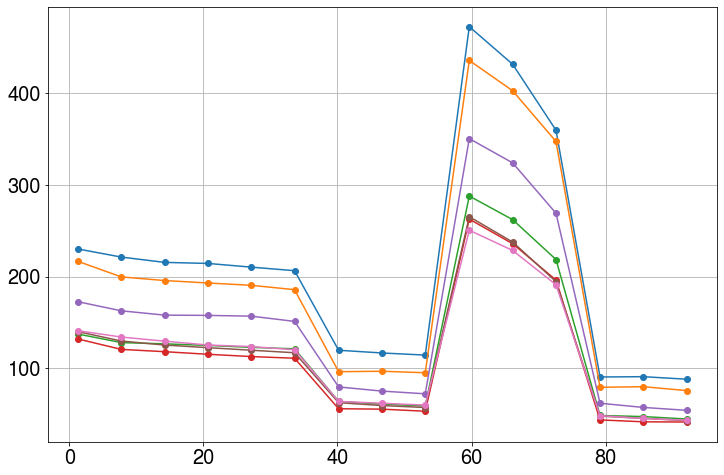

In [30]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_half_representative], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [31]:
relative_mu = ocr[samples_24h_half_representative].mean()/ocr[samples_24h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_24h_half_representative]/relative_mu

B04    1.441873
B05    1.309424
B07    0.839145
B08    0.767372
B09    1.042904
B10    0.799725
B11    0.799558
dtype: float64


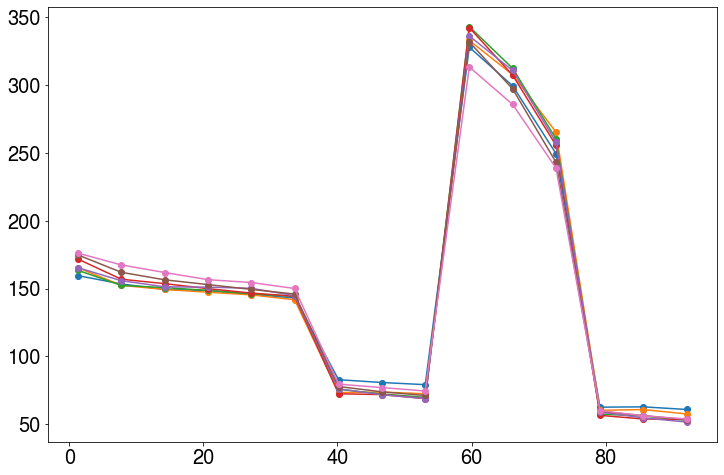

In [32]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

### 2.2.2. five

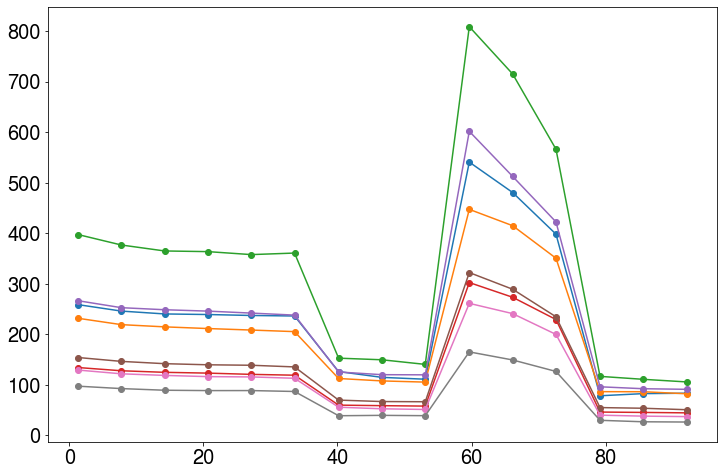

In [33]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five], 'o-')
matplotlib.pyplot.show()

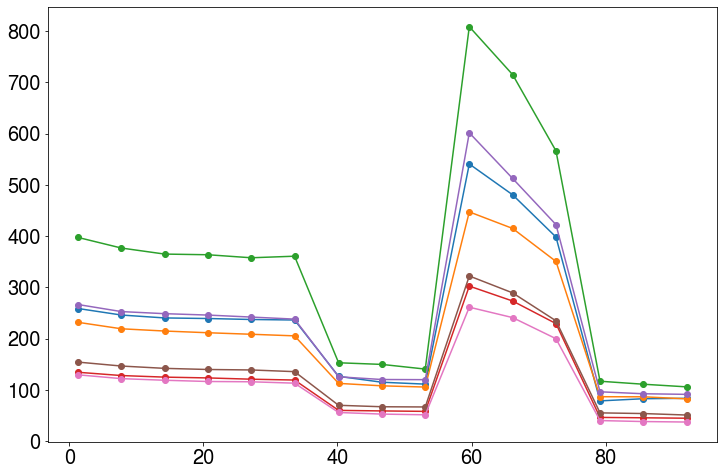

In [34]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five_representative], 'o-')
matplotlib.pyplot.show()

In [35]:
relative_mu = ocr[samples_24h_five_representative].mean()/ocr[samples_24h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_24h_five_representative]/relative_mu

C04    1.160773
C05    1.030784
C06    1.699493
C07    0.624620
C08    1.227968
C09    0.690542
C10    0.565821
dtype: float64


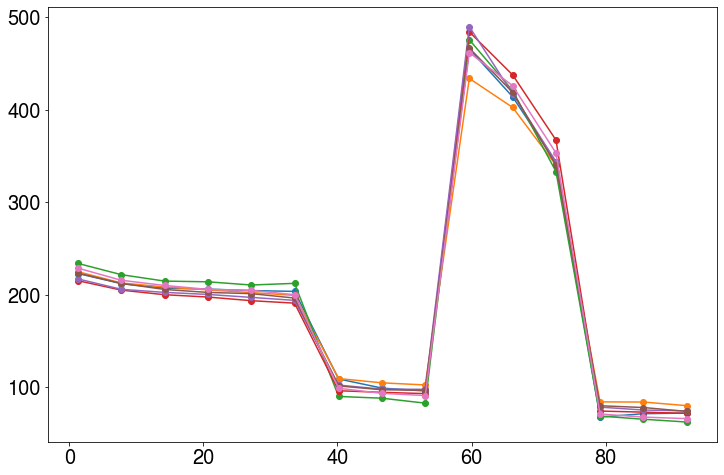

In [36]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

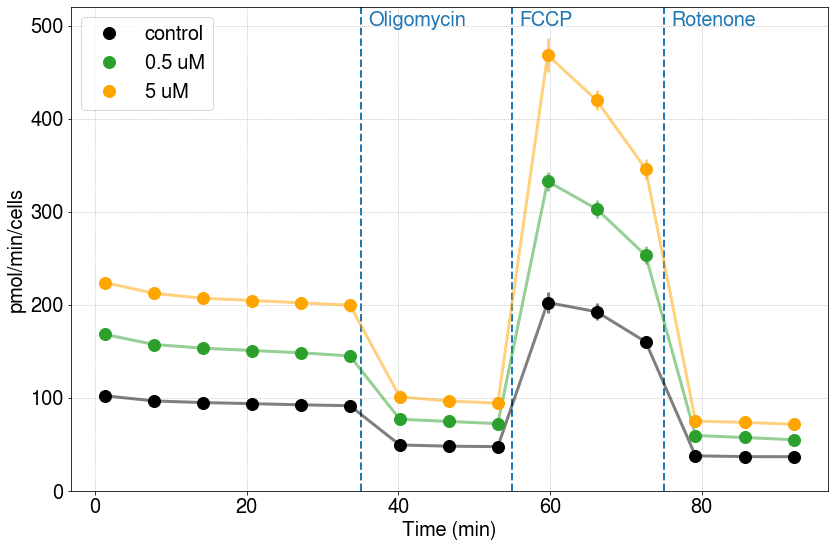

In [37]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 500, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 500, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 500, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 520])
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('seahorse.24h.svg')

In [38]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

In [39]:
atp_drop = numpy.mean(normalized_orange.iloc[6, :] - normalized_orange.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_orange.iloc[5, :]))

print(atp_drop, rel)

atp_drop = numpy.mean(normalized_green.iloc[6, :] - normalized_green.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_green.iloc[5, :]))

print(atp_drop, rel)

atp_drop = numpy.mean(normalized_black.iloc[6, :] - normalized_black.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_black.iloc[5, :]))

print(atp_drop, rel)

-98.51653462729973 49.37384126237751
-68.06148862341531 46.95510427739149
-42.22566323390025 46.15041655836618


In [40]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values
    
    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)
    
    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)
    
    print()

1.31182166
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

7.77566669
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

14.2333211116667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

20.6934414133333
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

27.15062079
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

33.6077456233333
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

40.1787807716667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

46.63917821
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

53.1022672866667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

59.6713138166667
half: significant 0.0025252525252525255
five: significant 0.0025252525252525255

66.1362596516667
half: significant 0.00252

## 2.3. boxplots

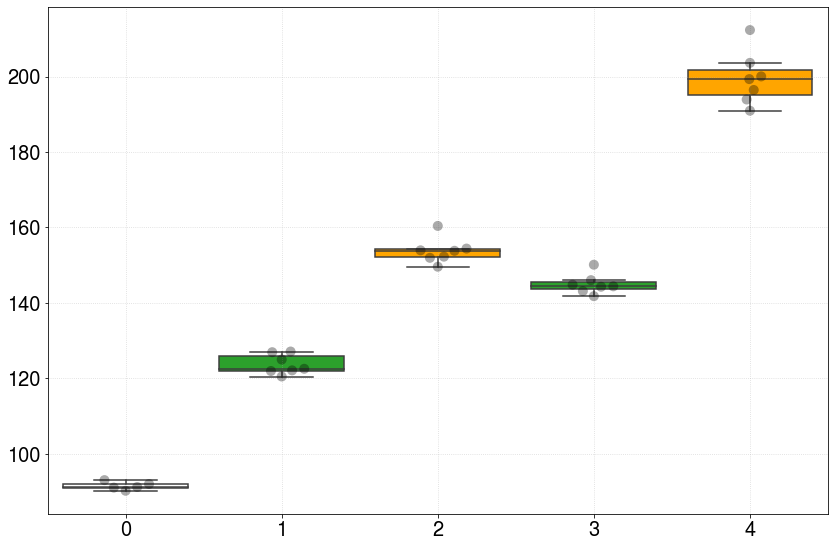

In [41]:
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)
canvas.artists[0].set_facecolor('white')
canvas.artists[1].set_facecolor('#2CA02C')
canvas.artists[2].set_facecolor('#FFA500')
canvas.artists[3].set_facecolor('#2CA02C')
canvas.artists[4].set_facecolor('#FFA500')

seaborn.swarmplot(data=boxplot_basal, color='black', alpha=1/3, size=10)

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('ocr.basal.svg')

In [42]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)
    
    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

12.5 1.0
	 91.49573586296384 91.49573586296384 1.0
0.0 0.0025252525252525255
	 91.49573586296384 123.74079278475119 1.352421417431757
0.0 0.0025252525252525255
	 91.49573586296384 153.77492838313339 1.680678634176429
0.0 0.0025252525252525255
	 91.49573586296384 144.95013837331925 1.584228346886196
0.0 0.0025252525252525255
	 91.49573586296384 199.531841372789 2.1807774918782483


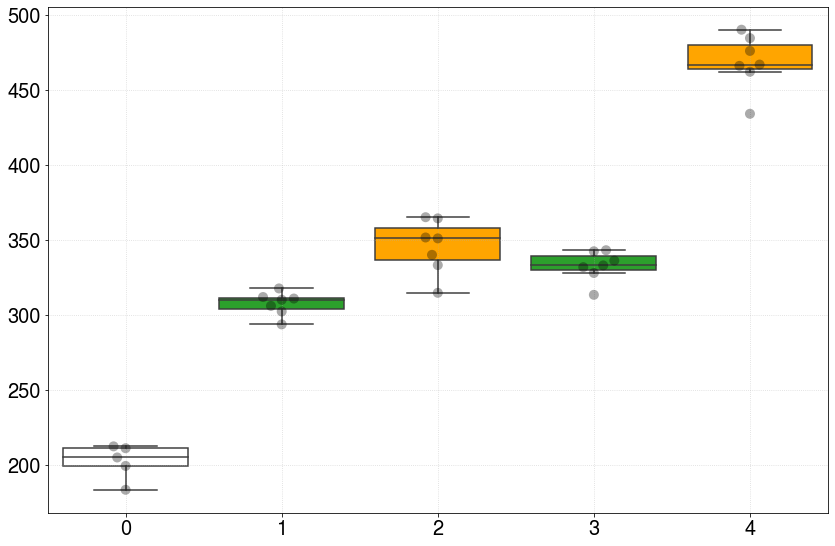

In [43]:
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)
canvas.artists[0].set_facecolor('white')
canvas.artists[1].set_facecolor('#2CA02C')
canvas.artists[2].set_facecolor('#FFA500')
canvas.artists[3].set_facecolor('#2CA02C')
canvas.artists[4].set_facecolor('#FFA500')

seaborn.swarmplot(data=boxplot_maximal, color='black', alpha=1/3, size=10)

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('ocr.maximal.svg')

In [44]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)
    
    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

12.5 1.0
	 202.3718094915861 202.3718094915861 1.0
0.0 0.0025252525252525255
	 202.3718094915861 307.5220433751288 1.519589334837244
0.0 0.0025252525252525255
	 202.3718094915861 345.70470369870054 1.708265121348701
0.0 0.0025252525252525255
	 202.3718094915861 332.55081786067984 1.6432665137310347
0.0 0.0025252525252525255
	 202.3718094915861 468.37783609264113 2.3144421017400383


# 3. ECAR

In [45]:
boxplot_basal = []
boxplot_maximal = []

In [46]:
ecar

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,8.407650,6.550789,7.312128,41.521886,8.091077,4.013540,19.146398,13.175619,31.689542,...,9.566771,5.347914,12.052368,4.730697,6.931359,6.648399,7.504785,6.938617,5.522570,4.632651
1,7.775667,-0.264131,4.904418,7.179003,32.143923,7.444085,2.123587,12.418820,10.306310,23.939776,...,3.905701,3.833571,10.412226,2.709200,4.787936,3.194346,5.386889,5.762994,4.394033,3.577903
2,14.233321,3.774156,3.739499,5.109435,26.875110,5.874951,1.254280,12.578813,8.014592,21.363095,...,2.837738,3.001844,7.834734,2.267564,4.648508,3.118768,4.584218,5.174790,4.216804,3.283878
3,20.693441,4.409699,3.925573,5.149942,25.777219,5.552855,1.808173,12.349781,9.150861,20.874910,...,2.807116,3.399161,8.209417,1.880040,3.930347,2.870400,3.848486,4.514199,3.896197,2.972457
4,27.150621,4.671864,3.983525,4.664416,24.748340,5.158654,1.302240,12.171860,8.086874,19.412343,...,3.347142,2.898741,8.248772,1.905995,4.157470,3.100286,3.844490,4.399784,3.873631,2.948154
5,33.607746,4.882176,3.662231,4.851892,25.518304,4.944978,1.099326,12.184781,7.417192,17.024780,...,2.959837,3.248637,7.467483,1.837192,3.188379,2.490145,3.474555,4.129750,3.563046,2.674442
6,40.178781,4.954038,3.614188,4.347176,24.204810,4.226439,0.452539,15.197238,6.417041,16.044243,...,2.679426,2.289877,4.833579,1.989743,3.911269,2.799716,3.881380,3.918684,3.655992,2.374552
7,46.639178,3.572150,3.325960,4.125047,18.101669,4.517288,1.544476,13.319496,6.680230,13.366256,...,2.842062,1.809898,4.637234,1.742564,3.865643,2.567432,2.761180,3.107602,2.746757,2.112116
8,53.102267,3.134220,2.761857,3.410725,18.674054,3.293243,0.689704,10.846937,6.636985,10.739891,...,2.584877,1.427094,3.699437,1.188834,2.750348,2.019780,2.520486,2.963702,2.540712,1.713172
9,59.671314,14.517533,14.673493,14.828220,74.322409,12.451721,1.595933,35.591293,27.086100,52.552030,...,11.825688,11.035823,26.091098,7.845292,12.873629,12.892815,11.008922,13.719362,12.211434,1.526869


In [47]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
samples_4h_half = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
samples_4h_five = ['E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']

control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02']
samples_4h_half_representative = samples_4h_half
samples_4h_five_representative = ['E04', 'E05', 'E06', 'E09', 'E10'] # removed E07, E08 and E11

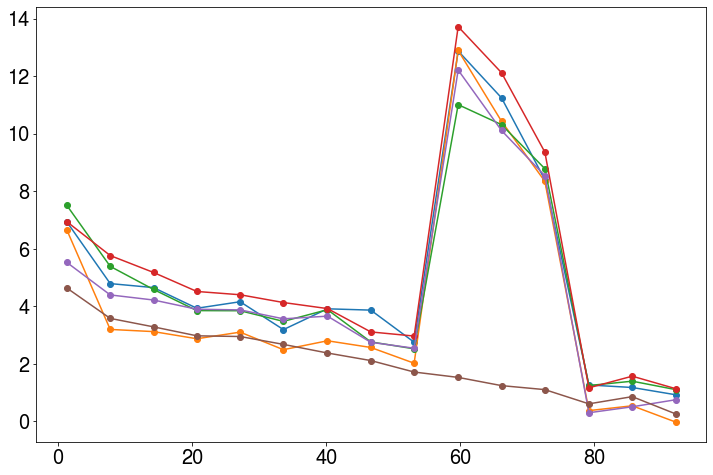

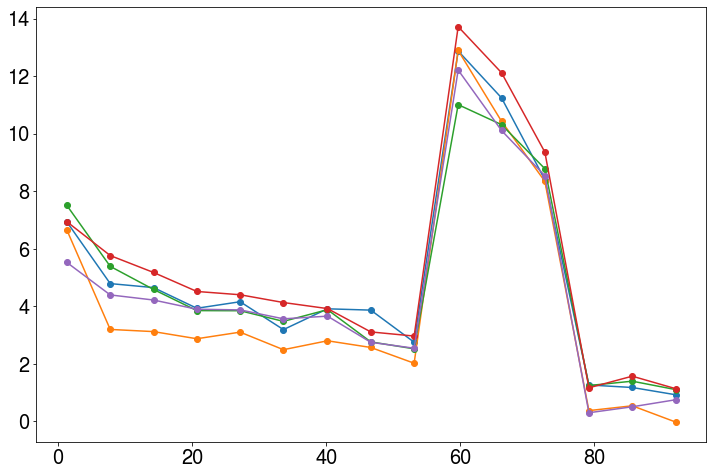

B02    1.046306
C02    0.867036
D02    1.012440
E02    1.130021
F02    0.944198
dtype: float64


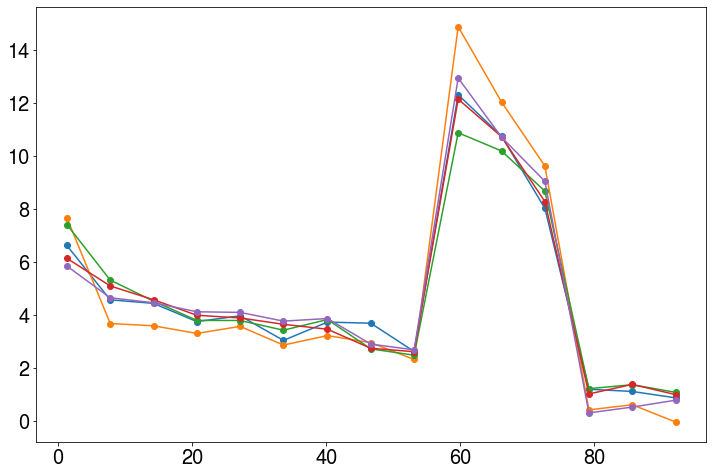

In [48]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells], 'o-')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(timepoints, ecar[control_wells_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[control_wells_representative].mean()/ecar[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ecar[control_wells_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

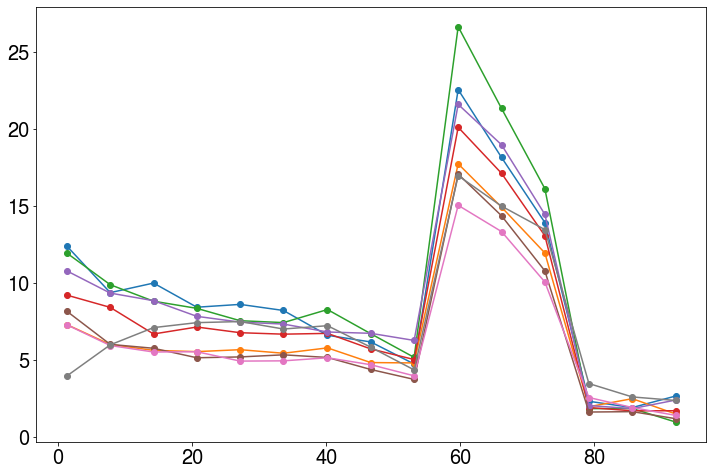

D04    1.171153
D05    0.874286
D06    1.230007
D07    1.015751
D08    1.142577
D09    0.822718
D10    0.794401
D11    0.949106
dtype: float64


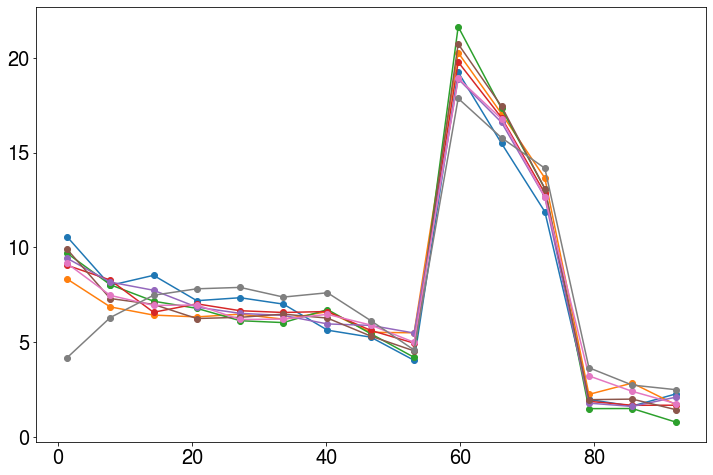

In [49]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_4h_half_representative].mean()/ecar[samples_4h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_4h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

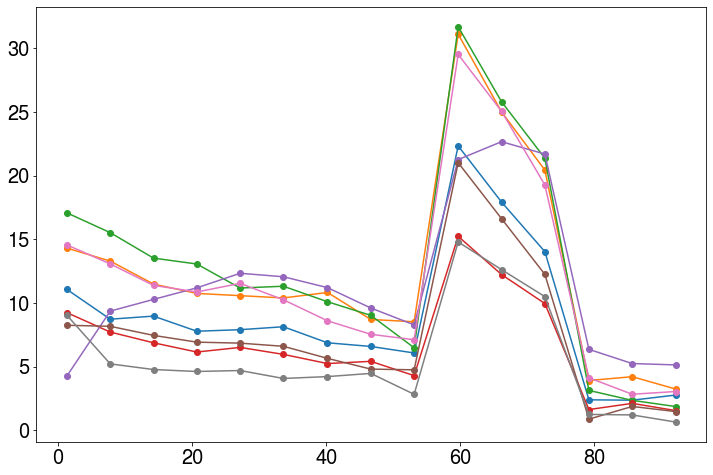

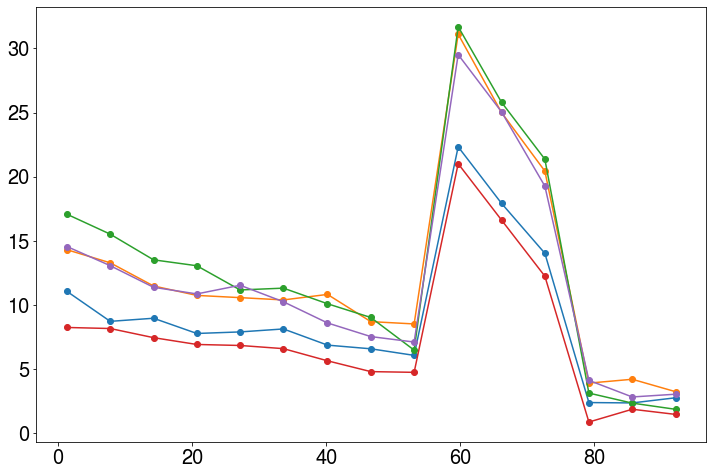

E04    0.830188
E05    1.158021
E06    1.199686
E09    0.703841
E10    1.108264
dtype: float64


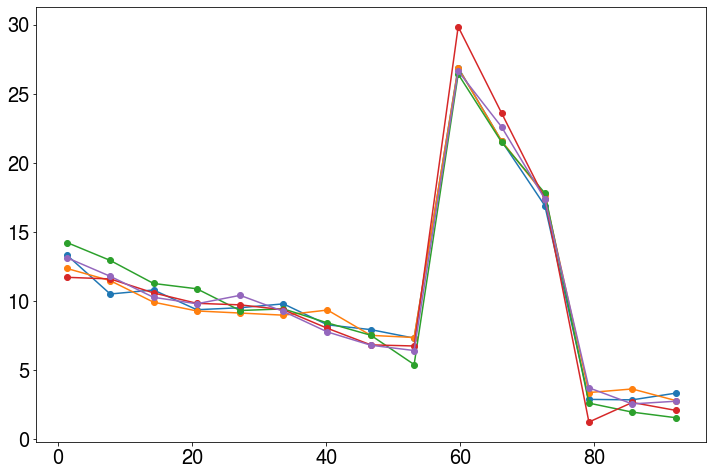

In [50]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five], 'o-')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_4h_five_representative].mean()/ecar[samples_4h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_4h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

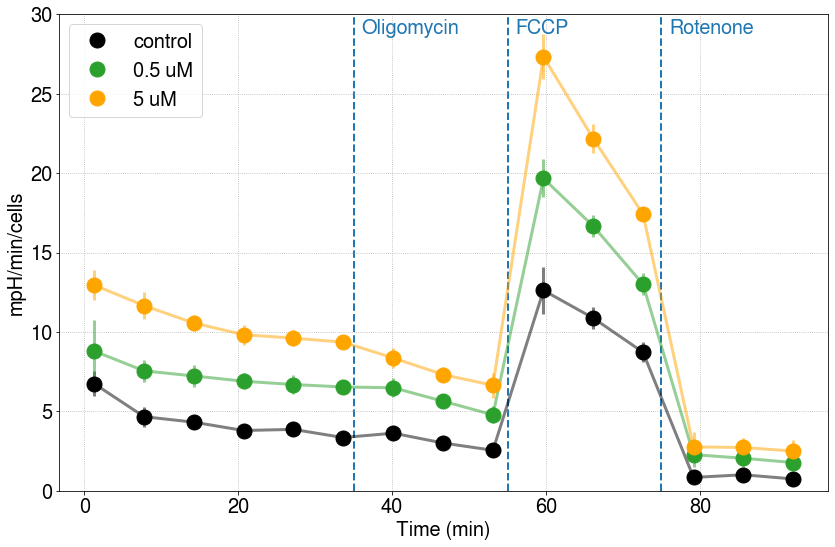

In [51]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 28.8, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 28.8, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 28.8, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 30])
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()

#matplotlib.pyplot.savefig('ecar.4h.svg')

In [52]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[9, :].to_list()
b =  normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

In [53]:
samples_24h_half = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
samples_24h_five = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']

samples_24h_half_representative = samples_24h_half
samples_24h_five_representative = samples_24h_five

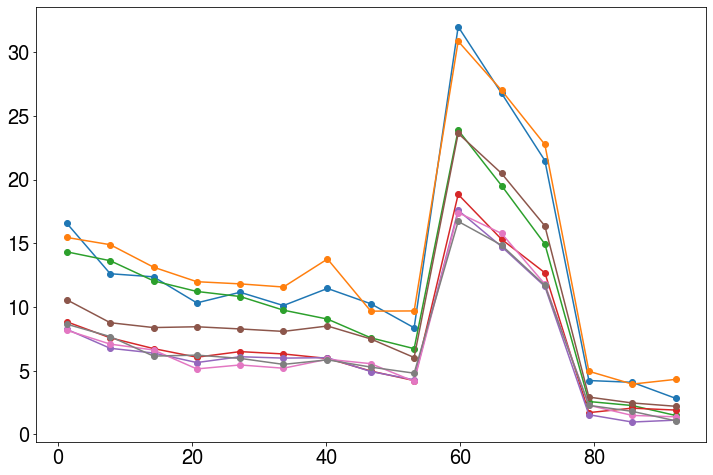

B04    1.387082
B05    1.466768
B06    1.139286
B07    0.781830
B08    0.726509
B09    1.016549
B10    0.737024
B11    0.744952
dtype: float64


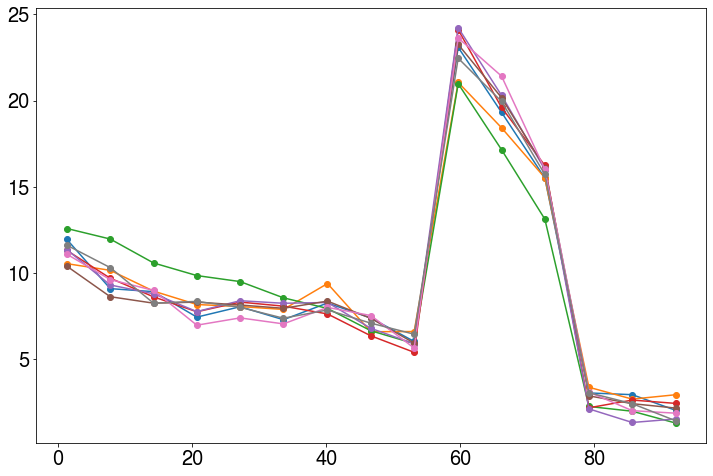

In [54]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_half_representative].mean()/ecar[samples_24h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_24h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

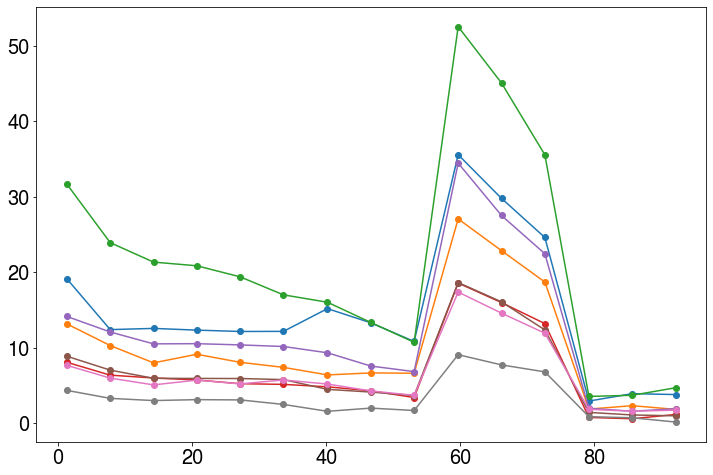

C04    1.444909
C05    0.985271
C06    2.090648
C07    0.651257
C08    1.188562
C09    0.671064
C10    0.639875
C11    0.328413
dtype: float64


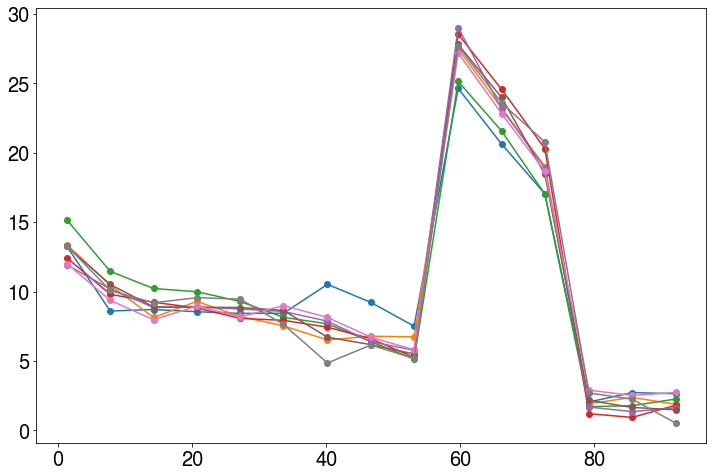

In [55]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_five], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_five_representative].mean()/ecar[samples_24h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_24h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

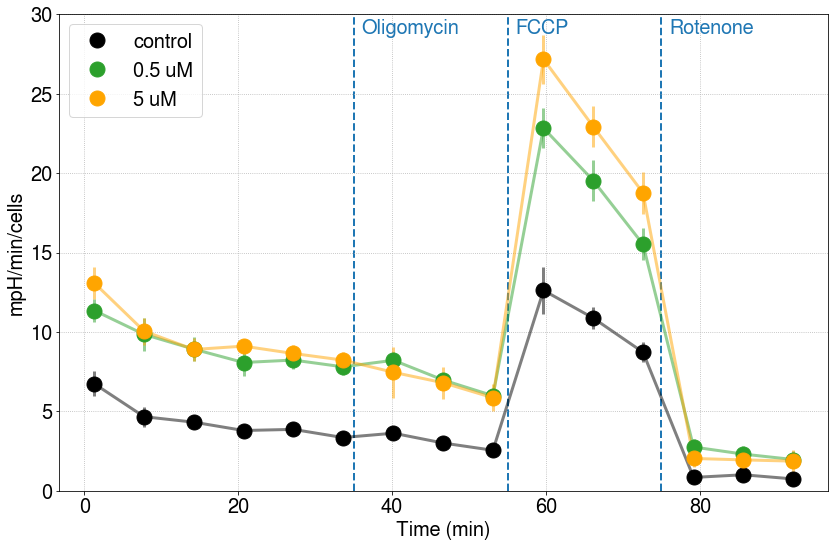

In [56]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 28.8, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 28.8, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 28.8, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 30])
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ecar.24h.svg')

In [57]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

## 3.3. boxplots

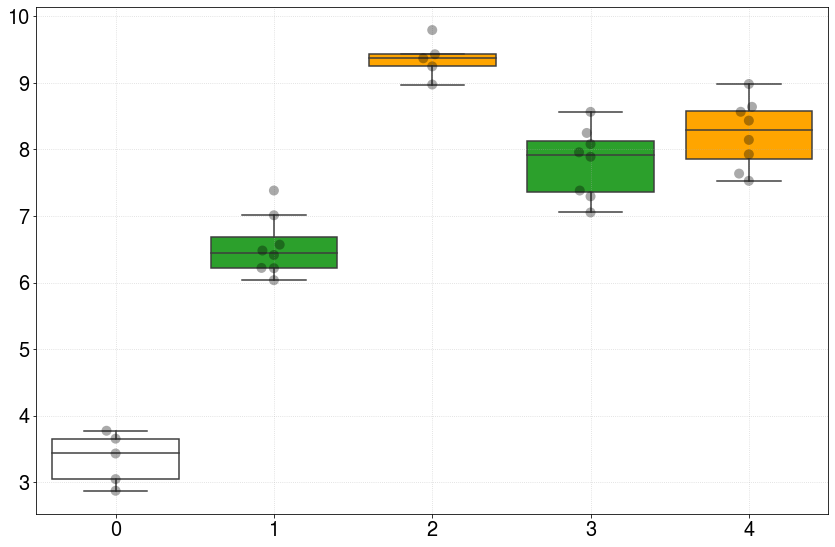

In [58]:
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)
canvas.artists[0].set_facecolor('white')
canvas.artists[1].set_facecolor('#2CA02C')
canvas.artists[2].set_facecolor('#FFA500')
canvas.artists[3].set_facecolor('#2CA02C')
canvas.artists[4].set_facecolor('#FFA500')

seaborn.swarmplot(data=boxplot_basal, color='black', alpha=1/3, size=10)

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('ecar.basal.svg')

In [59]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)
    
    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

12.5 1.0
	 3.355871556460842 3.355871556460842 1.0
0.0 0.001554001554001554
	 3.355871556460842 6.5409930999961965 1.9491190261448614
0.0 0.007936507936507936
	 3.355871556460842 9.362632448766695 2.7899257439520966
0.0 0.001554001554001554
	 3.355871556460842 7.808504312480869 2.3268185867983124
0.0 0.001554001554001554
	 3.355871556460842 8.231905946348288 2.4529860001643784


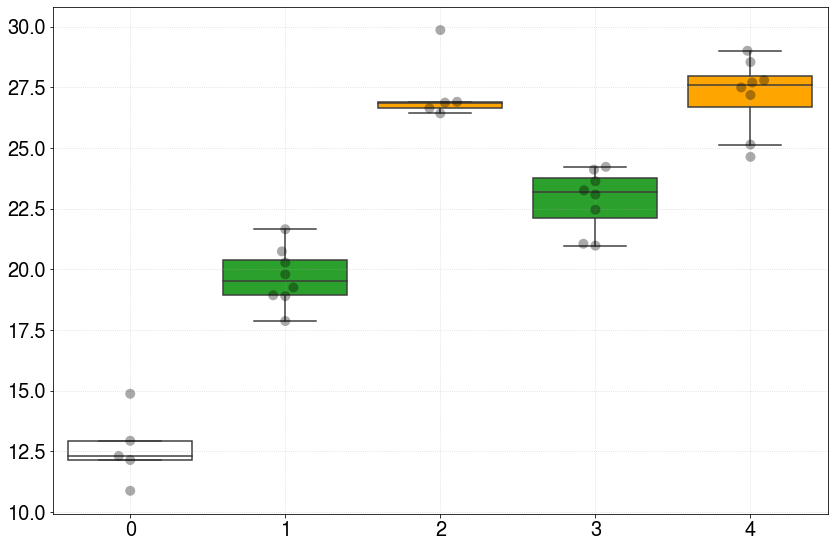

In [60]:
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)
canvas.artists[0].set_facecolor('white')
canvas.artists[1].set_facecolor('#2CA02C')
canvas.artists[2].set_facecolor('#FFA500')
canvas.artists[3].set_facecolor('#2CA02C')
canvas.artists[4].set_facecolor('#FFA500')

seaborn.swarmplot(data=boxplot_maximal, color='black', alpha=1/3, size=10)

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('ecar.maximal.svg')

In [61]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)
    
    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

12.5 1.0
	 12.624294271841256 12.624294271841256 1.0
0.0 0.001554001554001554
	 12.624294271841256 19.673778153095235 1.5584061753834426
0.0 0.007936507936507936
	 12.624294271841256 27.33568909896676 2.1653241369649923
0.0 0.001554001554001554
	 12.624294271841256 22.84521839669506 1.8096234058526173
0.0 0.001554001554001554
	 12.624294271841256 27.183474844091926 2.153266888330163
